In [ ]:
!pip install hpelm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from skimage import io, util, color
from skimage.feature import greycomatrix
from skimage.measure import shannon_entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from hpelm import ELM
import time

from skimage.transform import resize

# Function to extract GLCM features for a single image
def extract_features(image_path, target_size=(256, 256)):
    gray_image = io.imread(image_path, as_gray=True)
    gray_image_resized = resize(gray_image, target_size, anti_aliasing=True)
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    features = {}

    for distance in distances:
        for angle in angles:
            glcm = greycomatrix(util.img_as_ubyte(gray_image), distances=[distance], angles=[angle], symmetric=True, normed=True)

            # Extract features from GLCM
            features[f"Contrast_{distance}_{angle}"] = np.sum((glcm * np.arange(glcm.shape[0])[:, np.newaxis, np.newaxis, np.newaxis])**2)
            features[f"Energy_{distance}_{angle}"] = np.sum(glcm**2)
            features[f"Homogeneity_{distance}_{angle}"] = np.sum(glcm / (1. + np.arange(glcm.shape[0])[:, np.newaxis, np.newaxis, np.newaxis]))
            features[f"Correlation_{distance}_{angle}"] = np.sum((np.arange(glcm.shape[0])[:, np.newaxis, np.newaxis, np.newaxis] - np.mean(glcm, axis=0)) * (glcm - np.mean(glcm, axis=0)))
            features[f"Entropy_{distance}_{angle}"] = shannon_entropy(glcm)
    return features

# Directory paths for "yes" and "no" datasets in Google Drive
yes_dir = '/content/drive/MyDrive/MINIproject/MINIPROJECT/archive (2)/brain_tumor_dataset/yes'
no_dir = '/content/drive/MyDrive/MINIproject/MINIPROJECT/archive (2)/brain_tumor_dataset/no'

# List to store image paths and labels
image_paths = []
labels = []

# Load "yes" images
for filename in os.listdir(yes_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(yes_dir, filename)
        image_paths.append(image_path)
        labels.append(1)  # 1 represents "yes" for brain tumor

# Load "no" images
for filename in os.listdir(no_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(no_dir, filename)
        image_paths.append(image_path)
        labels.append(0)  # 0 represents "no" for no brain tumor


# Convert the lists to NumPy arrays
X = [extract_features(image_path) for image_path in image_paths]
y = np.array(labels)

# Create a DataFrame with the feature information
feature_df = pd.DataFrame(X)
feature_df["Label"] = y  # Add the labels to the DataFrame

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_df.drop("Label", axis=1), feature_df["Label"], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the ELM model with tanh activation function
elm_tanh = ELM(X_train_scaled.shape[1], 1)

# Add neurons with tanh activation
elm_tanh.add_neurons(256, 'tanh')  # Experiment with the number of neurons

# Reshape y_train to have two columns
y_train_2d = y_train.values.reshape(-1, 1)

# Measure training time for tanh activation
start_time_train_tanh = time.time()

# Train the ELM model with tanh activation
elm_tanh.train(X_train_scaled, y_train_2d)

# Calculate training time for tanh activation
training_time_tanh = (time.time() - start_time_train_tanh) * 1000

# Measure testing time for tanh activation
start_time_test_tanh = time.time()

# Make predictions on the test set with tanh activation
y_pred_tanh = elm_tanh.predict(X_test_scaled)

# Convert predictions to binary
y_pred_binary_tanh = np.where(y_pred_tanh > 0.5, 1, 0)

# Calculate testing time for tanh activation
testing_time_tanh = (time.time() - start_time_test_tanh) * 1000



/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

In [ ]:




# Evaluate the model and print only the accuracy
accuracy = accuracy_score(y_test, y_pred_binary_tanh)
print(f"Accuracy: {accuracy * 100:.2f}%")

#caluclate training time
print(f"Training Time: {training_time_tanh:.2f} milliseconds")

#calculate testing time
print(f"Testing Time: {testing_time_tanh:.2f} milliseconds")


Accuracy: 65.71%
Training Time: 18.50 milliseconds
Testing Time: 1.32 milliseconds


In [ ]:
print("Training set distribution:")
print(y_train.value_counts())

print("\nTesting set distribution:")
print(y_test.value_counts())


Training set distribution:
0    68
1    68
Name: Label, dtype: int64

Testing set distribution:
1    18
0    17
Name: Label, dtype: int64


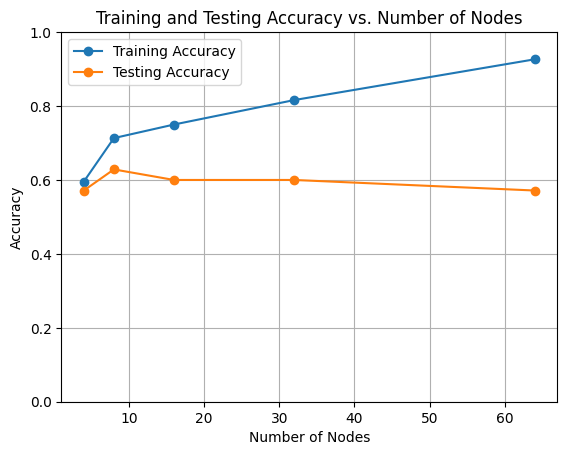

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have an ELM class with the add_neurons and train methods

# Experiment with different numbers of nodes
num_nodes_list = [4, 8, 16, 32, 64]
training_accuracy_list = []
testing_accuracy_list = []

for num_nodes in num_nodes_list:
    # Instantiate the ELM model
    elm = ELM(X_train_scaled.shape[1], 1)

    # Add neurons with tanh activation
    elm.add_neurons(num_nodes, 'tanh')

    # Reshape y_train to have two columns
    y_train_2d = y_train.values.reshape(-1, 1)

    # Train the ELM model
    elm.train(X_train_scaled, y_train_2d)

    # Make predictions on the training set
    y_train_pred = elm.predict(X_train_scaled)
    y_train_pred_binary = np.where(y_train_pred > 0.5, 1, 0)

    # Calculate training accuracy
    training_accuracy = accuracy_score(y_train, y_train_pred_binary)
    training_accuracy_list.append(training_accuracy)

    # Make predictions on the test set
    y_test_pred = elm.predict(X_test_scaled)
    y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

    # Calculate testing accuracy
    testing_accuracy = accuracy_score(y_test, y_test_pred_binary)
    testing_accuracy_list.append(testing_accuracy)

# Plotting the graph
plt.plot(num_nodes_list, training_accuracy_list, label='Training Accuracy', marker='o')
plt.plot(num_nodes_list, testing_accuracy_list, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy vs. Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()
